# Analyzing Win Conditions in League of Legends

This dataset provides samples from the first 10 minutes of high level League of Legends games. We will see what sorts of factors affect a team's chance of winning the game.

In [1]:
#Load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
df = pd.read_csv('C:/Users/TaguchY/docs/high_diamond_ranked_10min.csv')

In [2]:
#Show dataset
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
#Drop irrelevant data
df = df.drop("gameId", axis=1)

In [4]:
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


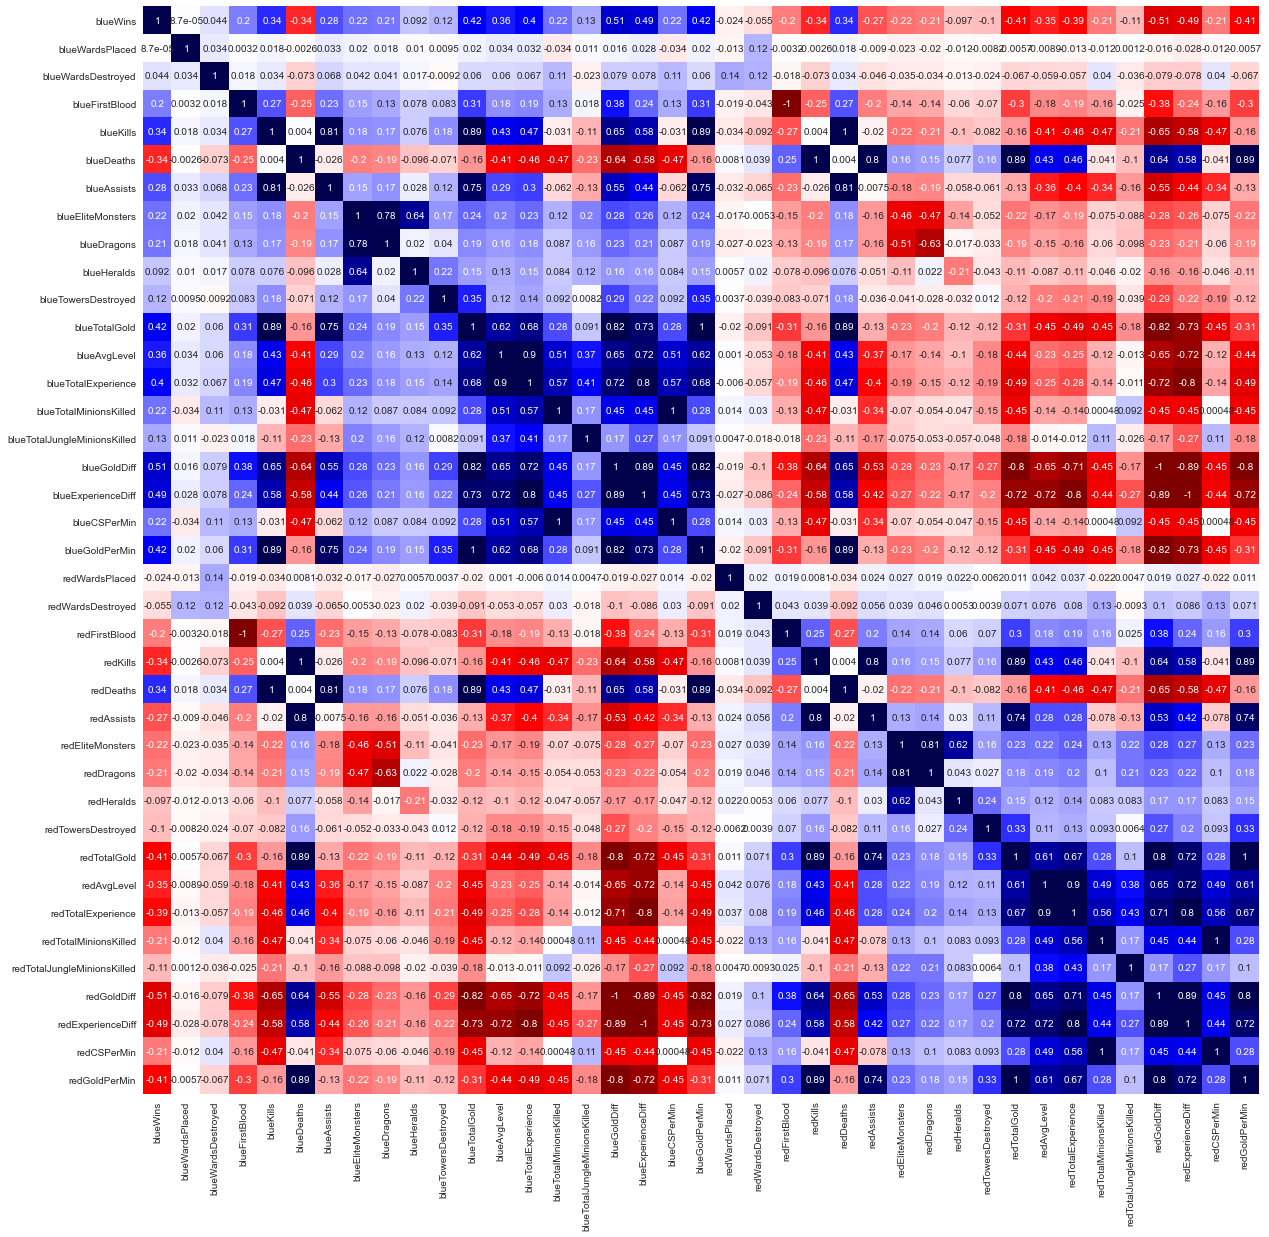

In [5]:
#Visualize correlation

plt.figure(figsize=(20,20))
labels = df.select_dtypes(include='number').columns.values

sns.heatmap(df.corr(), annot=True, vmax=0.8,vmin=-0.8, cmap='seismic_r', xticklabels=labels,yticklabels=labels, cbar=False)

plt.show()

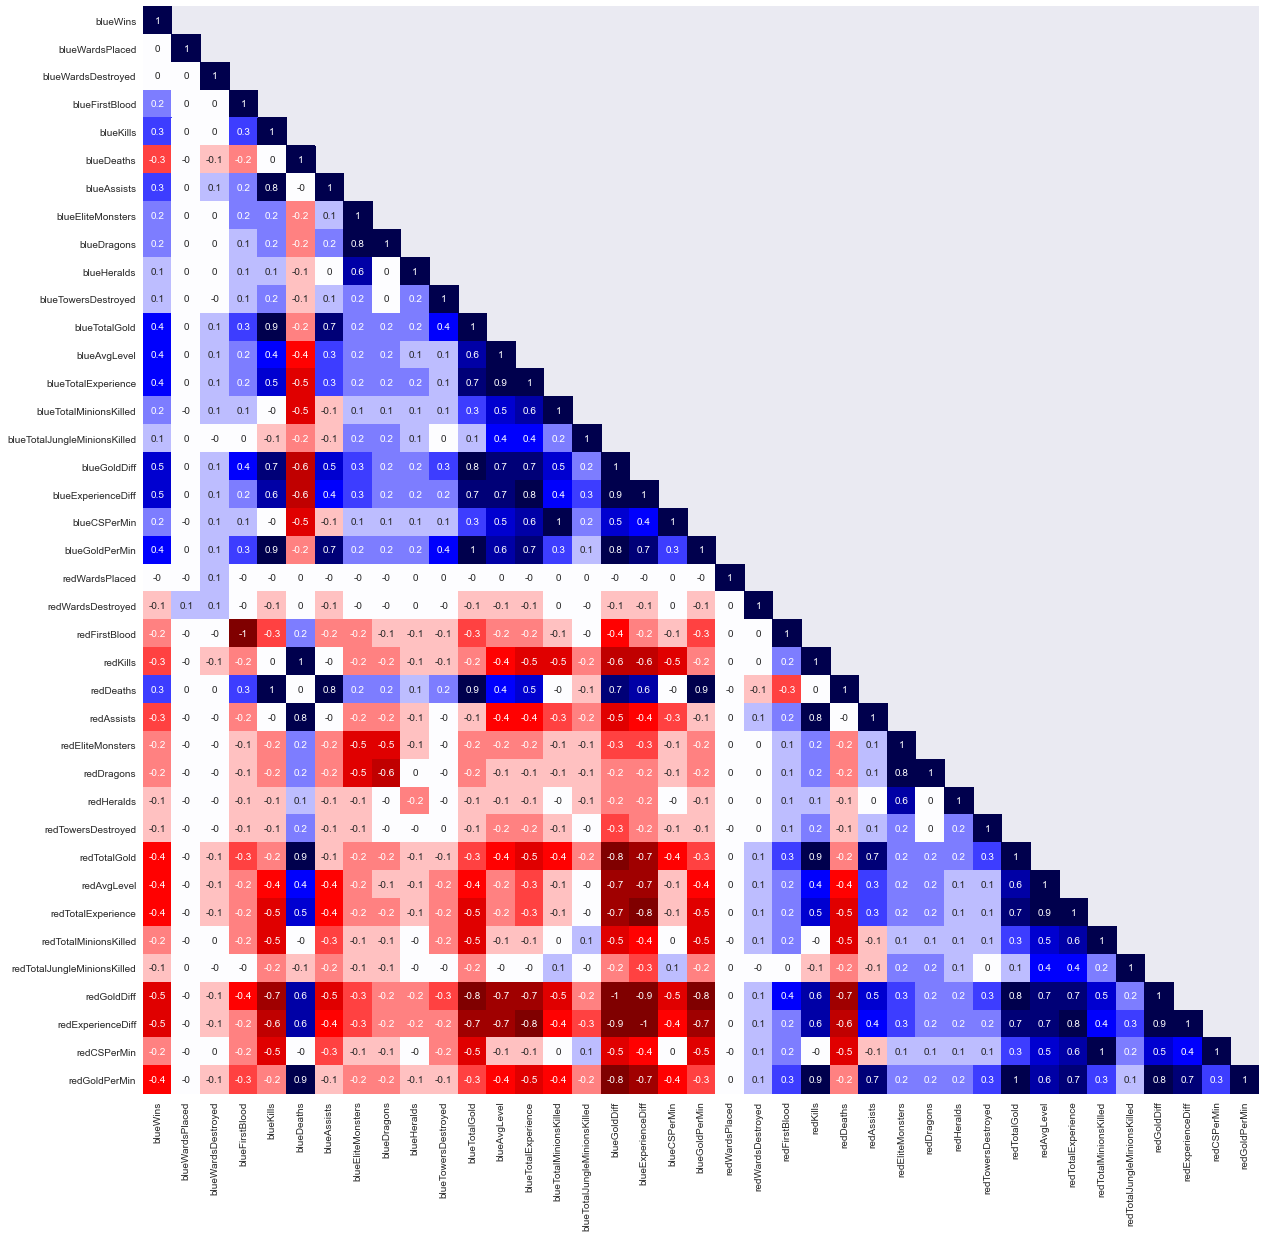

In [6]:
#Data is messy; clean up
cleaned = np.tril(df.corr())
cleaned[cleaned == 0] = None
cleaned = cleaned.round(1)

#Plot again
plt.figure(figsize=(20,20))
sns.heatmap(cleaned, annot=True, vmax=0.8,vmin=-0.8, cmap='seismic_r', xticklabels=labels,yticklabels=labels, cbar=False)
plt.show()

In [20]:
#We want to look for the categories that impact games the most.

#Dropping blue side data to visualize easier
blue_side = ['blueWardsPlaced', 'blueWardsDestroyed','blueFirstBlood', 'blueKills', 'redDeaths', 'blueAssists', 
             'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 
             'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 
             'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin']
df_red = df.copy()
df_red = df_red.drop(blue_side, axis=1)

df_red.head()

,blueWins,blueDeaths,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,6,15,6,0,6,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,5,12,1,1,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,11,15,3,1,11,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,5,15,2,1,5,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,6,17,2,1,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


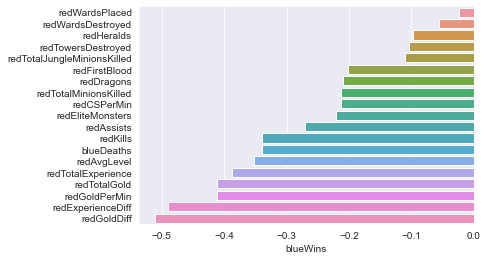

In [21]:
cleaned_red = df_red.corr()['blueWins'].drop('blueWins')
cleaned_red = cleaned_red.sort_values(ascending=False)
sns.barplot(y=cleaned_red.index, x=cleaned_red)

plt.show()

# Conclusion

Looking at the data, red side wins more when there is a gold and experience difference, and is least affected by wards. However, due to the complex nature of the game, this is a very vague conclusion to reach. This due to the fact that almost all of the other categories directly affect a player's gold and experience as well. Champion kills, minion kills, monster kills, and even ward kills provide experience and gold to a player. However, the data does show that kills and assists are the most impactful, which makes sense because they provide the biggest swing in gold and experience. Personally, I am disappointed by the lack of presence in wards (vision) in correlation to victories. My most played role in the game is called "support," which, as the name suggests, supports the team by providing utility, and most importantly, vision. My assumption is that because this data set is from solo play as opposed to an organized team setting, the lack of clear communication depreciates the value of vision in the game. Additionally, this data set only covers the first 10 minutes of the game, where vision control/denial is arguably the least important, and least prevelant.